## Check vote totals in Michigan primary

### (plot at bottom)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

download: https://mielections.us/election/results/DATA/2020PPR_MI_CENR_BY_COUNTY.xls

main: https://mielections.us/election/results/2020PPR_CENR.html

In [2]:
# read .xls from downloaded file
df = pd.read_csv('assets/2020PPR_MI_CENR_BY_COUNTY.xls', delimiter = '\t')
df['CandidateVotes'].fillna(0, inplace = True)
df['CandidateVotes'] = [int(x) for x in df['CandidateVotes']]
df.head()

,ElectionDate,OfficeCode(Text),DistrictCode(Text),StatusCode,CountyCode,CountyName,OfficeDescription,PartyOrder,PartyName,PartyDescription,CandidateID,CandidateLastName,CandidateFirstName,CandidateMiddleName,CandidateFormerName,CandidateVotes,WriteIn(W)/Uncommitted(Z),Recount(*),Nominated(N)/Elected(E)
0,2020-03-10,01,00000,0,1.0,ALCONA,President of the United States 4 Year Term (1)...,1.0,DEM,Democratic,-1284.0,Bennet,Michael,NaN,NaN,1,NaN,NaN,NaN
1,2020-03-10,01,00000,0,1.0,ALCONA,President of the United States 4 Year Term (1)...,1.0,DEM,Democratic,-1285.0,Biden,Joe,NaN,NaN,742,NaN,NaN,NaN
2,2020-03-10,01,00000,0,1.0,ALCONA,President of the United States 4 Year Term (1)...,1.0,DEM,Democratic,-1286.0,Bloomberg,Michael,R.,NaN,61,NaN,NaN,NaN
3,2020-03-10,01,00000,0,1.0,ALCONA,President of the United States 4 Year Term (1)...,1.0,DEM,Democratic,-1287.0,Booker,Cory,NaN,NaN,1,NaN,NaN,NaN
4,2020-03-10,01,00000,0,1.0,ALCONA,President of the United States 4 Year Term (1)...,1.0,DEM,Democratic,-1288.0,Buttigieg,Pete,NaN,NaN,6,NaN,NaN,NaN


In [3]:
df[df['CountyName'].isnull()]

,ElectionDate,OfficeCode(Text),DistrictCode(Text),StatusCode,CountyCode,CountyName,OfficeDescription,PartyOrder,PartyName,PartyDescription,CandidateID,CandidateLastName,CandidateFirstName,CandidateMiddleName,CandidateFormerName,CandidateVotes,WriteIn(W)/Uncommitted(Z),Recount(*),Nominated(N)/Elected(E)
3780,RECORDS: 3780,RESULTS: UNOFFICIAL,RUNDATE: 03/12/2020,RUNTIME: 7:33:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


In [4]:
df = df[pd.notnull(df['CountyName'])]

In [5]:
print('Total Sanders votes: {}'.format(df.loc[df['CandidateLastName'] == 'Sanders', 'CandidateVotes'].sum()))
print('Total Biden votes: {}'.format(df.loc[df['CandidateLastName'] == 'Biden', 'CandidateVotes'].sum()))

Total Sanders votes: 1252260
Total Biden votes: 1676982


In [6]:
list_ = []
for county in list(set(df['CountyName'])):
    listlet = [county]
    little_df = df[df['CountyName'] == county]
    for cand in ['Sanders', 'Biden']:
        littler_df = little_df[little_df['CandidateLastName'] == cand]
        total = littler_df['CandidateVotes'].sum()
        listlet.append(total)
    list_.append(listlet)
    
newdf = pd.DataFrame(list_)
newdf.columns = ['county', 'Sanders', 'Biden']
newdf['combined'] = newdf['Sanders'] + newdf['Biden']
newdf.sort_values(['combined'], ascending = True, inplace = True)
newdf

,county,Sanders,Biden,combined
73,KEWEENAW,306,464,770
9,LUCE,322,562,884
8,OSCODA,406,892,1298
20,BARAGA,560,882,1442
82,ONTONAGON,542,958,1500
...,...,...,...,...
7,WASHTENAW,92134,97556,189690
27,MACOMB,88342,132136,220478
5,KENT,191426,95008,286434
16,OAKLAND,173332,290816,464148


<Figure size 432x288 with 0 Axes>

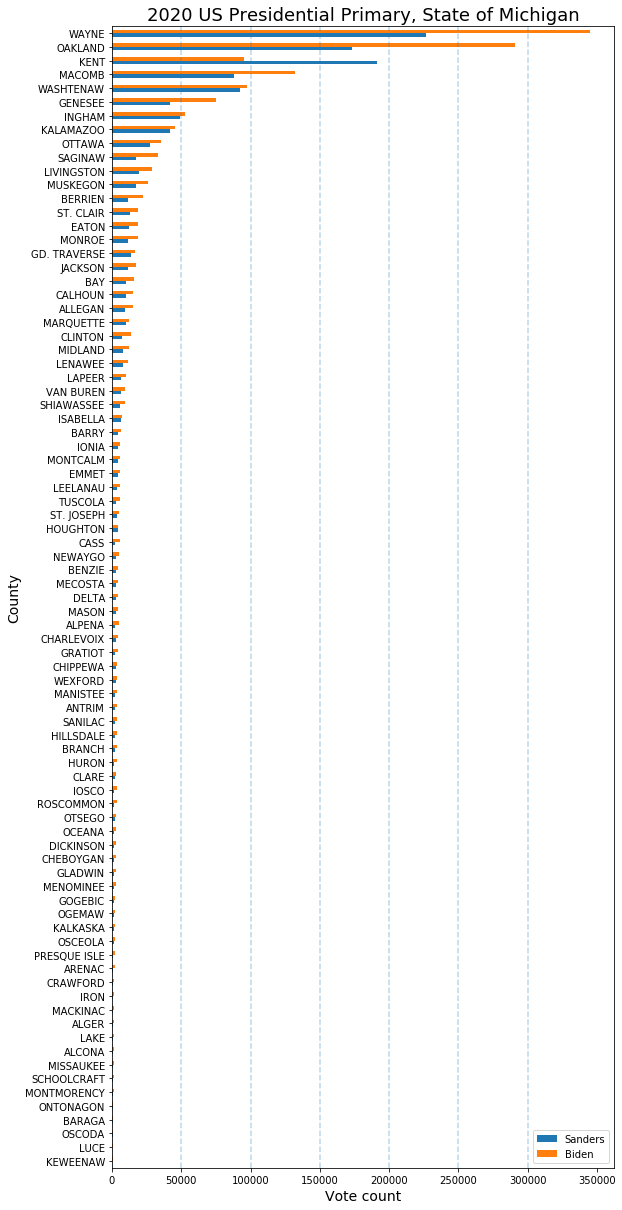

In [7]:
plt.figure()

newdf.plot('county', ['Sanders', 'Biden'], kind = 'barh', figsize = (9, 21))

max_ = max(newdf['Sanders'].max(), newdf['Biden'].max())
thousands = range(0, max_ + 1000, 50000)
for which in thousands:
    plt.axvline(which, ls = '--', alpha = 0.3)
    
plt.title('2020 US Presidential Primary, State of Michigan', fontsize = 18)
plt.ylabel('County', fontsize = 14)
plt.xlabel('Vote count', fontsize = 14)
plt.show();